In [224]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [225]:

G = ( lambda x1,x2,x3,x4: x1**2 + x2**2 + x3**2 + x4**2 - 1 )


def GetVectorF(G,r):
    
    v = G(r[0],r[1],r[2],r[3])
        
    return v

def GetJacobian(G,r,h=1e-6):
    
    J = np.zeros(4)
    
    
    J[0] = (  G(r[0]+h,r[1],r[2],r[3]) - G(r[0]-h,r[1],r[2],r[3]) )/(2*h)
    J[1] = (  G(r[0],r[1]+h,r[2],r[3]) - G(r[0],r[1]-h,r[2],r[3]) )/(2*h)
    J[2] = (  G(r[0],r[1],r[2]+h,r[3]) - G(r[0],r[1],r[2]-h,r[3]) )/(2*h)
    J[3] = (  G(r[0],r[1],r[2],r[3]+h) - G(r[0],r[1],r[2],r[3]-h) )/(2*h)
        
    return J.T

def GetMetric(G,r):
    v = GetVectorF(G,r)
    return 0.5*np.linalg.norm(v)**2

In [226]:
#r = np.random.uniform(-1,1,size=4)
#r

In [227]:
def GetFig(F,R,it):
    
    fig = plt.figure(figsize=(8,4))
    
    labels = ['X1','X2','X3','X4']
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    ax.set_title('Metric: %.20f' %(F[it]))

    ax.plot(F[:it])
    ax.set_xlabel('%.0f' %(it))
    ax.set_yscale('log')
    ax1.plot(R[:it],label=labels)
    ax1.set_xlabel('%.0f' %(it))
    ax1.legend(loc=0)
    
    plt.show()

In [228]:
def GetSolve(G,r,lr=1e-3,epochs=int(1e5),error=1e-7):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        
        J = GetJacobian(G,r)
        
        GVector = GetVectorF(G,r)
        
        
        r -= lr*np.dot(J,GVector) 
        
        R_vector = np.vstack((R_vector,r))
        
        NewF = GetMetric(G,r)
        
        
        Vector_F = np.append(Vector_F,NewF)
        
        d = np.abs( CurrentF - NewF )/NewF
        
        if it%500 == 0:
            
            clear_output(wait=True)
            GetFig(Vector_F,R_vector,it)
            time.sleep(0.01)
            
        it += 1
        
    if d < error:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r,it,Vector_F,R_vector

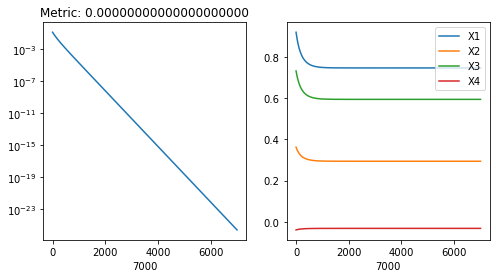

 Entrenamiento completo  0.0 iteraciones 7372


In [165]:
a,it,f,R = GetSolve(G,r)

In [166]:
a

array([ 0.74749931,  0.29405355,  0.59476306, -0.03215881])

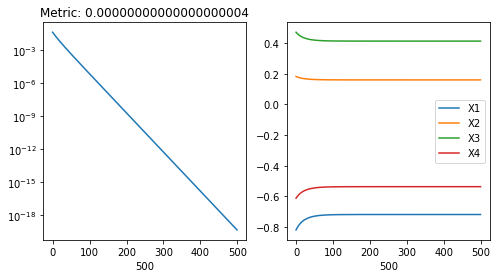

 Entrenamiento completo  0.0 iteraciones 776
999


In [229]:
Points = []

for i in range(1000):
    r = np.random.uniform(-1,1,size=4)
    P,it,f,R = GetSolve(G,r,lr=1e-2,error=1e-5)
    Points.append(P)
    print(i)

In [230]:
len(Points)

1000

In [231]:
Points
Sphere = []
for i in range(len(Points)):
    if (np.round((Points[i][0]**2 + Points[i][1]**2 + Points[i][2]**2 + Points[i][3]**2),5)) == 1:
        Sphere.append(Points[i])
     
print(len(Sphere))

1000


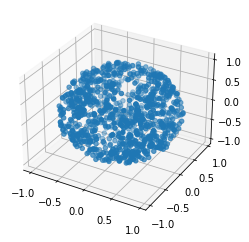

In [232]:
x = []
y = []
z = []

for i in range(len(Points)):
    x.append(Sphere[i][0])
    y.append(Sphere[i][1])
    z.append(Sphere[i][2])

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(x,y,z)

La proyección espacial de S^3 es una esfera en R^3.